# Mini Proje - UCSD
## Detayli Bilgi
Bu proje UCSanDiegoX: DSE200x kursunun 6. haftasina denk gelen calismayi icermektedir. Projede kullanilan veri Movielens datasetini icermekte ve yillara ait cesitli filmlere verilmis puanlari incelemektedir. Calismada *ml-latest.zip* dosyasi kullanilmis olup 58.000 film icin 280.000 kullanici tarafindan verilmis toplam 27.000.000 puan bilgisini icermektedir. Dosya boyutu buyuk oldugu icin bu dosyaya dahil edilmemis, altta referans edilen sayfadan indirilebilmektedir.

* **Veri Lokasyonu:** https://grouplens.org/datasets/movielens/

## Motivasyon
Kisisel olarak genc yaslarimda izlemis oldugum ve etkilendigim Sci-Fi filmlerini yillar sonra tekrar izledigimde, bende ilk izledigimden cok farkli bir izlenim birakmaktadir. 
Buradan yola cikarak, ciktigi yila gercekci bir sekilde hitap eden vezamanin teknolojik imkanlarini sonuna kadar kullanan filmlerin uzerinden yillar gecince tekrar degerlendiginde o gunun sartlarindan etkilenilerek farkli degerlendirildigi ihtimalinin oldugunu dusunmekteyim. Calismanin amaci bu soruya yanit bulmaktir.




# Temel Kutuphane Kullanimi Icin Hazirlik
Calismadan kullanilacak olan kutuphaneleri import ediyoruz.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# veri iceren data klasoru yeri
PROJECT_FOLDER = 'movielens'

# Oy sayisi 1000 alti olan filmleri degerlendirmeye almayacagiz
MIN_VOTE_THRESHOLD = 1000

%matplotlib inline
plt.style.use('ggplot')

# Calisilacak Dosyalarin Ve Iceriklerinin Kontrolu
Indirilen dosyalar buyuk oldugu icin, Unix komutlari kullanilarak hangi dosyalarla calisacagimiza ve onlarin iceriklerine iliskin temel ipuclari bulalim.

In [2]:
# klasorun icine goz atalim
!ls ./movielens

links.csv
movies.csv
ratings.csv
README.txt
tags.csv


In [3]:
# teker teker dosyalarin ust 10 satirina bakip icerigini ogrenelim
!head ./movielens/links.csv

movieId,imdbId,tmdbId
1,0114709,862
2,0113497,8844
3,0113228,15602
4,0114885,31357
5,0113041,11862
6,0113277,949
7,0114319,11860
8,0112302,45325
9,0114576,9091


In [4]:
!head ./movielens/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


In [5]:
!head ./movielens/ratings.csv

userId,movieId,rating,timestamp
1,307,3.5,1256677221
1,481,3.5,1256677456
1,1091,1.5,1256677471
1,1257,4.5,1256677460
1,1449,4.5,1256677264
1,1590,2.5,1256677236
1,1591,1.5,1256677475
1,2134,4.5,1256677464
1,2478,4.0,1256677239


In [6]:
!head ./movielens/tags.csv

userId,movieId,tag,timestamp
14,110,epic,1443148538
14,110,Medieval,1443148532
14,260,sci-fi,1442169410
14,260,space action,1442169421
14,318,imdb top 250,1442615195
14,318,justice,1442615192
14,480,Dinosaurs,1443148563
14,593,psychothriller,1444014286
14,1682,philosophy,1442615158


Bu projede filmlere verilen puanlarla calisacagimiz icin sadece iki dosya ile calisiyor olacagiz. Dosyalari platform bagimsiz adresleme yaparak Pandas Dataframe icine alalim.

In [7]:
MOVIES_FILE = os.path.join(PROJECT_FOLDER, 'movies.csv')
RATINGS_FILE = os.path.join(PROJECT_FOLDER, 'ratings.csv')

movies_df = pd.read_csv(MOVIES_FILE)
ratings_df = pd.read_csv(RATINGS_FILE)

# Detayli Icerik Analizi
Calisacagimiz dosyalari dataframe icerisine cektik. Simdi dataframe olarak icindeki bilgilerin adedine ve sekline tekrar goz atalim.

In [8]:
movies_df.shape


(58098, 3)

In [9]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
ratings_df.shape

(27753444, 4)

In [11]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


Ayni zamanda puan araliklarini da merak ediyoruz. Puanlamalar 0.5 - 5 arasinda bir degerle tanimlanmistir.

In [12]:
print(f"Oylama puan araliklari: {ratings_df.rating.min()} - {ratings_df.rating.max()} ") 

Oylama puan araliklari: 0.5 - 5.0 


 Iki df arasinda movieId bilgisinin ortak oldugunu goruyoruz. Bu alani kullanarak bu iki df'i birlestirerek tek dataframe elde edelim.

In [13]:
movies = movies_df.merge(ratings_df, on='movieId', how='inner')
movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,1113765937
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,948885850
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1442169375
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,1370810063
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,1237622631


`Sci-Fi` kategorisi disindaki kayitlari kullanmayacagiz.

In [15]:
print(f"Maskeleme oncesi yapi: {movies.shape}")
scifi_mask = movies['genres'].str.contains('Sci-Fi')
movies = movies[scifi_mask]
print(f"Maskeleme sonrasi yapi: {movies.shape}")

Maskeleme oncesi yapi: (27753444, 6)
Maskeleme sonrasi yapi: (4740208, 6)


# Sutun Cikarma ve Ekleme
DF icindeki bazi alnlara ihtiyacimiz olmayacak, bazi bilgileri daha rahat kullanabilmek icin ise ek alanlar seklinde yeniden duzenlememiz gerekecek.

In [16]:
# Oncelikle filmerin yil bilgisini isminden bularak ek bir sutun haline getirelim
movies['movie_year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies['movie_year'] = pd.to_numeric(movies['movie_year'], errors = 'coerce')

In [17]:
movies.tail()

,movieId,title,genres,userId,rating,timestamp,movie_year
27753398,193803,Bleach: Memories of Nobody (2006),Animation|Fantasy|Sci-Fi,215971,1.5,1537637705,2006.0
27753399,193803,Bleach: Memories of Nobody (2006),Animation|Fantasy|Sci-Fi,266075,5.0,1537659897,2006.0
27753417,193837,Lily C.A.T. (1987),Animation|Horror|Sci-Fi,81924,2.0,1537919872,1987.0
27753429,193861,Cold Harvest (1998),Action|Sci-Fi|Thriller,1686,3.0,1537816652,1998.0
27753441,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,33330,2.0,1537890512,2017.0


Simdi timestamp bilgisinden puanlamanin yapildigi yili bulalim ve sonrasinda timestamp ve diger kullanilmayan sutunlarini sileim.

In [18]:
movies['rating_date'] = pd.to_datetime(movies['timestamp'], unit='s')
movies['rating_year'] = movies['rating_date'].dt.year

# Ihtiyacimiz olmayan verileri silerek dataframe temizligi yapalim
del movies['movieId']
del movies['genres']
del movies['userId']
del movies['rating_date']
del movies['timestamp']

movies.head()

,title,rating,movie_year,rating_year
372104,Powder (1995),4.0,1995.0,1999
372105,Powder (1995),3.0,1995.0,1996
372106,Powder (1995),3.5,1995.0,2011
372107,Powder (1995),1.0,1995.0,2014
372108,Powder (1995),3.0,1995.0,2012


Verinin temizliginden emin olmak icin **null** kontrolu yapalim.

In [19]:
movies.isnull().any()

title          False
rating         False
movie_year      True
rating_year    False
dtype: bool

Veri setinde bazi filmlerin basliginda yil bilgisi gecmemis, sayisi az ise df icinden silebiliriz.

In [20]:
movies[movies.movie_year.isnull()]

,title,rating,movie_year,rating_year
22674664,Babylon 5,4.0,NaN,2015
22674665,Babylon 5,5.0,NaN,2017
22674666,Babylon 5,5.0,NaN,2018
22674667,Babylon 5,5.0,NaN,2016
22674668,Babylon 5,4.5,NaN,2015
...,...,...,...,...
27749906,The Death of Superman,4.5,NaN,2018
27749907,The Death of Superman,4.0,NaN,2018
27749908,The Death of Superman,1.0,NaN,2018
27749909,The Death of Superman,4.0,NaN,2018


Film adinin yaninda yil bilgisi olmayan kayitlar var, bunlar azinlikta oldugu icin dataframe'den cikaralim. Daha once yapilan CPU yogun islemleri tekrar yapmamak icin bundan sonraki islemlerde `movies_cleaned` degiskeni ile devam ediyoruz.

In [21]:
movies_cleaned = movies.copy()
movies_cleaned = movies_cleaned.dropna()

In [22]:
movies_cleaned.isnull().sum()

title          0
rating         0
movie_year     0
rating_year    0
dtype: int64

Veriler temizlenmis gozukuyor. Simdi filmin cikis yilinda yapilan yorumlari isaretleyelim. Ve analizde kullanacagimiz oylamanin kac yil sonra yapildigi bilgisini tutalim.

In [23]:
movies_cleaned['rated_same_year'] = (movies_cleaned['movie_year'] == movies_cleaned['rating_year'])
movies_cleaned['rate_delay'] = (movies_cleaned['rating_year'] - movies_cleaned['movie_year'])
movies_cleaned.shape

(4738776, 6)

Data kirliliginden kaynaklanan ve oylamanin film tarihinden once gozuken kisimlari var ise, dataset icinden silelim:

In [24]:
fltr = movies_cleaned.rate_delay >= 0
movies_cleaned = movies_cleaned[fltr]
movies_cleaned.shape

(4738344, 6)

Az oy almis eski filmler olabilir. Film bazinda gruplayarak belirli bir limitin altinda oy verilmis filmleri bizi sasirtmamasi icin analizde kullanmak istemiyoruz.

In [25]:
ratings_by_movie = movies_cleaned[['rating', 'title']].groupby('title', as_index = False).count()

In [26]:
ratings_by_movie.head()

,title,rating
0,*batteries not included (1987),2007
1,+1 (2013),59
2,.hack//Beyond the World (2012),2
3,009 Re: Cyborg (2012),10
4,009-1: The End of the Beginning (2013),1


In [27]:
# daha sonra ana tablo ile merge yapilacagi icin `rating`'ten daha farkli sutun atayalim
ratings_by_movie.columns = ['title', 'ratings_count']
ratings_by_movie.head()

,title,ratings_count
0,*batteries not included (1987),2007
1,+1 (2013),59
2,.hack//Beyond the World (2012),2
3,009 Re: Cyborg (2012),10
4,009-1: The End of the Beginning (2013),1


Esas tablomuza her film icin toplam oy sayisin sutun olarak ekleyelelim. Bunun icin bu iki tabloyu join etmemiz gerekiyor.

In [28]:
movies_with_ratings_count = movies_cleaned.merge(ratings_by_movie, on='title', how='inner')
movies_with_ratings_count.shape


(4738344, 7)

Belirli bir adedin altinda oy almis kayitlari eleyelim.

In [29]:
fltr = movies_with_ratings_count.ratings_count > MIN_VOTE_THRESHOLD
movies_with_ratings_count = movies_with_ratings_count[fltr]
movies_with_ratings_count.shape

(4533370, 7)

In [30]:
movies_with_ratings_count.tail()

,title,rating,movie_year,rating_year,rated_same_year,rate_delay,ratings_count
4736234,Deadpool 2 (2018),2.5,2018.0,2018,True,0.0,1633
4736235,Deadpool 2 (2018),4.0,2018.0,2018,True,0.0,1633
4736236,Deadpool 2 (2018),4.5,2018.0,2018,True,0.0,1633
4736237,Deadpool 2 (2018),3.5,2018.0,2018,True,0.0,1633
4736238,Deadpool 2 (2018),3.5,2018.0,2018,True,0.0,1633


Artik `ratings_count` sutununa ihtiyacimiz yok, silelim ve geri donusu kolay olmasi icin yeni degisken ile devam edelim.

In [31]:
del movies_with_ratings_count['ratings_count']
ratings_by_movie = movies_with_ratings_count

In [32]:
ratings_by_movie.shape

(4533370, 6)

## Verilerin Ayrilmasi 
Son olarak datayi iki ana dataframe'e ayiralim. Birisi film ile ayni yil icinde yapilan oylamalar, digeri ise filin cikis yilindan sonra yapilan oylamalar.

In [33]:
same_year_ratings = ratings_by_movie[ratings_by_movie.rated_same_year == True]
late_ratings = ratings_by_movie[ratings_by_movie.rated_same_year == False]

In [34]:
same_year_ratings.shape

(206664, 6)

In [35]:
late_ratings.shape

(4326706, 6)

Korelasyon tablosunu daha temiz gorebilmek icin ihtiyac olmayan son sutunu da siliyoruz.

In [36]:
del(same_year_ratings['rated_same_year'])
del(late_ratings['rated_same_year'])

# Bulgu 1
Oncelikle ayni yil icinde yapilan puanlamalarla daha sonraki yillarda yapilan puanlama arasinda major farklarin olup olmadigina bakalim. Korelasyon bilgilerine bakilinca:
1. **Ayni yil** icinde yapilan puanlamalarin dogal olarak hicbir sekilde filmin cikis yilindan **etkilenmiyor** oldugu
2. Daha **sonraki yillarda** filmlere verilen puanlamanin zaman ilerledikce filmin cikis yilina **ters yonde**etkilenirken, filmin uzerinden gecen yil sayisindan **etkilenmedigi**  gorulmustur

In [37]:
same_year_ratings.corr()

,rating,movie_year,rating_year,rate_delay
rating,1.000000,0.098208,0.098208,NaN
movie_year,0.098208,1.000000,1.000000,NaN
rating_year,0.098208,1.000000,1.000000,NaN
rate_delay,NaN,NaN,NaN,NaN


In [38]:
late_ratings.corr()

,rating,movie_year,rating_year,rate_delay
rating,1.000000,-0.050029,0.057763,0.089808
movie_year,-0.050029,1.000000,0.437397,-0.843085
rating_year,0.057763,0.437397,1.000000,0.114846
rate_delay,0.089808,-0.843085,0.114846,1.000000


## Bulgu 2
Sci-Fi kategorili filmlerin cikis yili icinde verilen oylarin dagilimi ile, daha sonrasinda verilen oylarin dagilimi arasinda fark bulunamamistir. *4 > 3 > 5 > 2 > 1* seklinde dagilim siralamasi aradan yillar gecse de **kendini korumaktadir**.

Genel olarak her iki veri setine bakildiginda filmin uzerinden gecen yil sayisi gozetmeksizin ayni oranda puan dagilimi gorulmektedir.

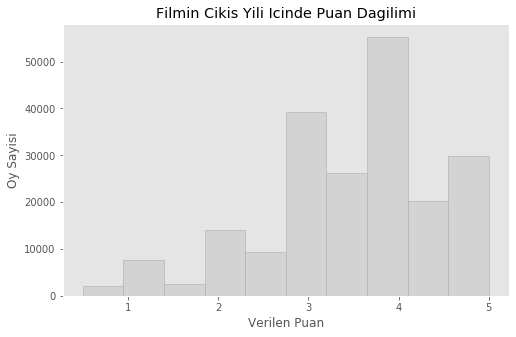

In [39]:
same_year_ratings.rating.plot(kind='hist', color='lightgray', edgecolor='darkgray', figsize=(8,5))

plt.title('Filmin Cikis Yili Icinde Puan Dagilimi')
plt.xlabel('Verilen Puan')
plt.ylabel('Oy Sayisi')
plt.grid()

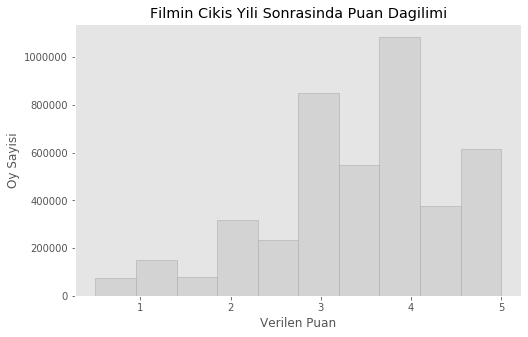

In [40]:
late_ratings.rating.plot(kind='hist', color='lightgray', edgecolor='darkgray', figsize=(8,5))

plt.title('Filmin Cikis Yili Sonrasinda Puan Dagilimi')
plt.xlabel('Verilen Puan')
plt.ylabel('Oy Sayisi')
plt.grid()

## Bulgu 3
Sci-Fi kategorili filmlerin cikis yili sonrasinda verilen oylarin dagilimi ile, daha sonrasinda verilen oylarin dagilimi arasinda fark bulunamamistir. *4 > 3 > 5 > 2 > 1* seklinde dagilim siralamasi aradan yillar gecse de **kendini korumaktadir**.

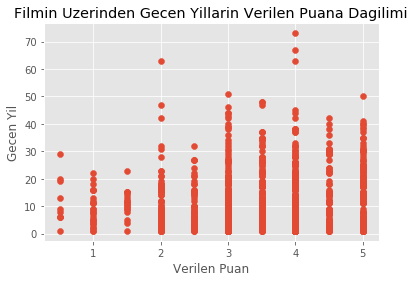

In [41]:
# dataset icinden bir orneklem alalim
late_ratings_sample = late_ratings.sample(1000)

rating = late_ratings_sample['rating'].values
rate_delay = late_ratings_sample['rate_delay'].values

plt.title('Filmin Uzerinden Gecen Yillarin Verilen Puana Dagilimi')
plt.xlabel('Verilen Puan')
plt.ylabel('Gecen Yil')
plot = plt.scatter(rating, rate_delay)

## Bulgu 4
....